In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy as ccrs
import cartopy.feature as cfeature

DATA ANALYSIS:

In [3]:
#loading the data:
train= pd.read_csv(r"C:\Users\Khushi Chaudhari\Desktop\illegal fishing\illegal_fishing_trn_data.csv")
print( "length of training data:",len(train))
print()
(train.columns)

length of training data: 838860



Index(['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon'],
      dtype='object')

In [4]:
#train data description:
train.describe()


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
count,8.388600e+05,8.388600e+05,8.388600e+05,8.388600e+05,838857.000000,838857.000000,838860.000000,838860.000000
mean,6.473898e+13,1.424273e+09,2.978600e+04,4.754523e+04,2.297752,183.344641,52.284092,5.946398
std,4.463747e+13,3.866942e+07,6.801536e+04,8.329854e+04,3.747304,114.404061,7.487147,11.325362
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779861,4.585558
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651


In [5]:
#check for missing values
print("\n Missing Values")
train.isnull().sum()


 Missing Values


mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  3
course                 3
lat                    0
lon                    0
dtype: int64

In [6]:
nan_values = train.isna()

# Count the number of NaN values in each column
nan_count_per_column = train.isna().sum()

# Count the total number of NaN values in the DataFrame
total_nan_count = train.isna().sum().sum()

#print("NaN values in the entire DataFrame:")
#print(nan_values)
print("\nNaN count per column:")
print(nan_count_per_column)
print("\nTotal NaN count in the DataFrame:", total_nan_count)


NaN count per column:
mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  3
course                 3
lat                    0
lon                    0
dtype: int64

Total NaN count in the DataFrame: 6


In [7]:

print("\nunique in column: \n")
for column in train.columns:
    print(column,train[column].nunique())


unique in column: 

mmsi 15
timestamp 826524
distance_from_shore 19232
distance_from_port 23667
speed 212


course 3605
lat 301708
lon 346841


In [8]:
print(train["mmsi"].value_counts())

mmsi
121426486551523    127495
1252339803566      107249
51101297206144      93526
80423450140220      81625
5145483253513       72747
77261928739173      55927
19859547683322      52553
69609856269322      49094
34911701098431      47944
78359653510570      42878
121739171405202     40300
141431600530701     23191
112453193185843     22827
108916342700357     13119
116333895145045      8385
Name: count, dtype: int64


In [9]:
#load the labels
labels= pd.read_csv(r"C:\Users\Khushi Chaudhari\Desktop\illegal fishing\illegal_fishing_trn_class_labels.csv")
labels.head()

,Unnamed: 0,label
0,d1,-1
1,d2,-1
2,d3,-1
3,d4,-1
4,d5,-1


In [10]:
print(train.shape)
print(labels.shape)

(838860, 8)
(838860, 2)


In [11]:
labels= labels.drop(columns = ['Unnamed: 0'])

In [12]:
labeled_data = pd.concat([train.reset_index(drop=True), labels.reset_index(drop=True)], axis=1)

print(labeled_data.shape)
labeled_data

(838860, 9)


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,label
0,121426486551523,1392604788,62239.937500,69998.281250,10.3,70.000000,50.052689,-1.631830,-1
1,1252339803566,1456971800,42952.410156,52477.277344,5.4,93.000000,20.688517,-17.457317,-1
2,121739171405202,1428161768,0.000000,2999.926270,0.0,99.000000,56.518200,20.990850,-1
3,141431600530701,1438085847,0.000000,999.975464,0.0,320.899994,42.356224,14.414068,-1
4,19859547683322,1438331947,11401.474609,49647.546875,3.1,129.100006,53.902554,8.275746,-1
...,...,...,...,...,...,...,...,...,...
838855,51101297206144,1372087434,0.000000,10049.628906,0.0,343.600006,52.914463,4.797502,-1
838856,5145483253513,1440923683,0.000000,1999.950928,0.0,335.000000,57.695148,-2.002600,-1
838857,34911701098431,1446406724,136689.734375,181907.593750,2.3,183.500000,55.434978,18.964701,-1
838858,19859547683322,1453508316,0.000000,999.975464,0.0,277.700012,53.862309,8.709233,-1


In [13]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838860 entries, 0 to 838859
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mmsi                 838860 non-null  int64  
 1   timestamp            838860 non-null  int64  
 2   distance_from_shore  838860 non-null  float64
 3   distance_from_port   838860 non-null  float64
 4   speed                838857 non-null  float64
 5   course               838857 non-null  float64
 6   lat                  838860 non-null  float64
 7   lon                  838860 non-null  float64
 8   label                838860 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 57.6 MB


In [14]:
n = labeled_data.groupby(['label']).size()
print(n)

label
-1    802828
 0     30237
 1      5795
dtype: int64


['0:Not fishing', '1:Fishing', '-1:No class label']
From here we infer this to be 3 class classification problem

the data is very imbalanced.With -1, i.e no class labels to be the most

In [15]:
#checking for the null values
labeled_data.isnull().sum()

mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  3
course                 3
lat                    0
lon                    0
label                  0
dtype: int64

In [16]:
#imputing the respective null values, i.e in speed and in course
mean_value = labeled_data['speed'].mean()
labeled_data['speed'].fillna(mean_value, inplace=True)
labeled_data['speed'] = labeled_data['speed'].astype(float)

mean_value = labeled_data['course'].mean()
labeled_data['course'].fillna(mean_value, inplace=True)
labeled_data['course'] = labeled_data['course'].astype(float)

In [17]:
#again checking if we imputed correctly.
labeled_data.isnull().sum()

mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  0
course                 0
lat                    0
lon                    0
label                  0
dtype: int64

In [18]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838860 entries, 0 to 838859
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   mmsi                 838860 non-null  int64  
 1   timestamp            838860 non-null  int64  
 2   distance_from_shore  838860 non-null  float64
 3   distance_from_port   838860 non-null  float64
 4   speed                838860 non-null  float64
 5   course               838860 non-null  float64
 6   lat                  838860 non-null  float64
 7   lon                  838860 non-null  float64
 8   label                838860 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 57.6 MB


In [19]:
import pandas as pd

# Assuming labeled_data is your DataFrame
nan_values = labeled_data.isna()

# Count the number of NaN values in each column
nan_count_per_column = labeled_data.isna().sum()

# Count the total number of NaN values in the DataFrame
total_nan_count = labeled_data.isna().sum().sum()

print("\nNaN count per column:")
print(nan_count_per_column)
print("\nTotal NaN count in the DataFrame:", total_nan_count)



NaN count per column:
mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  0
course                 0
lat                    0
lon                    0
label                  0
dtype: int64

Total NaN count in the DataFrame: 0


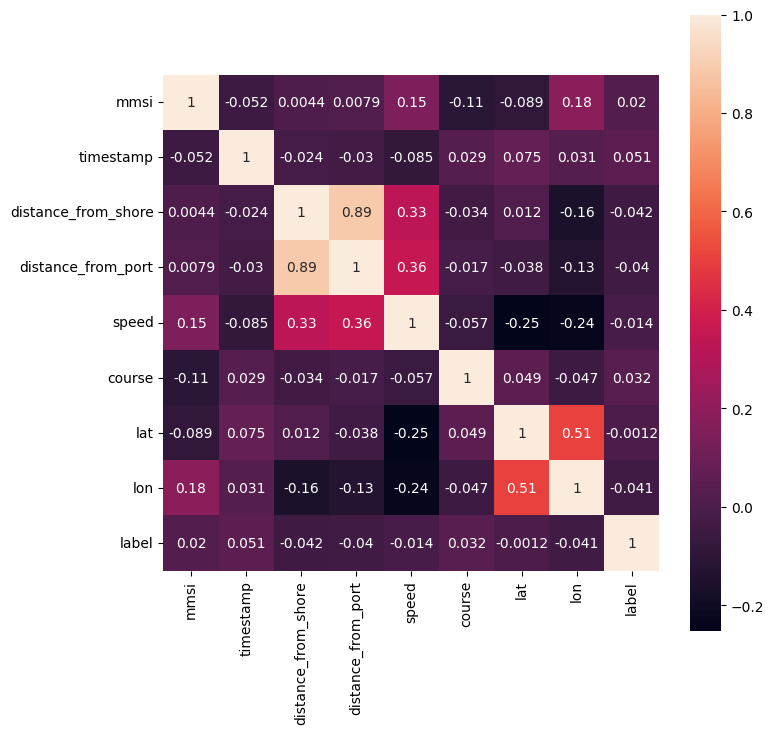

In [20]:
# Correlation Matrix
corr_matrix =labeled_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, square=True)
#sns.heatmap(corr_matrix, annot=True,square=True, cmap='coolwarm')
plt.show()

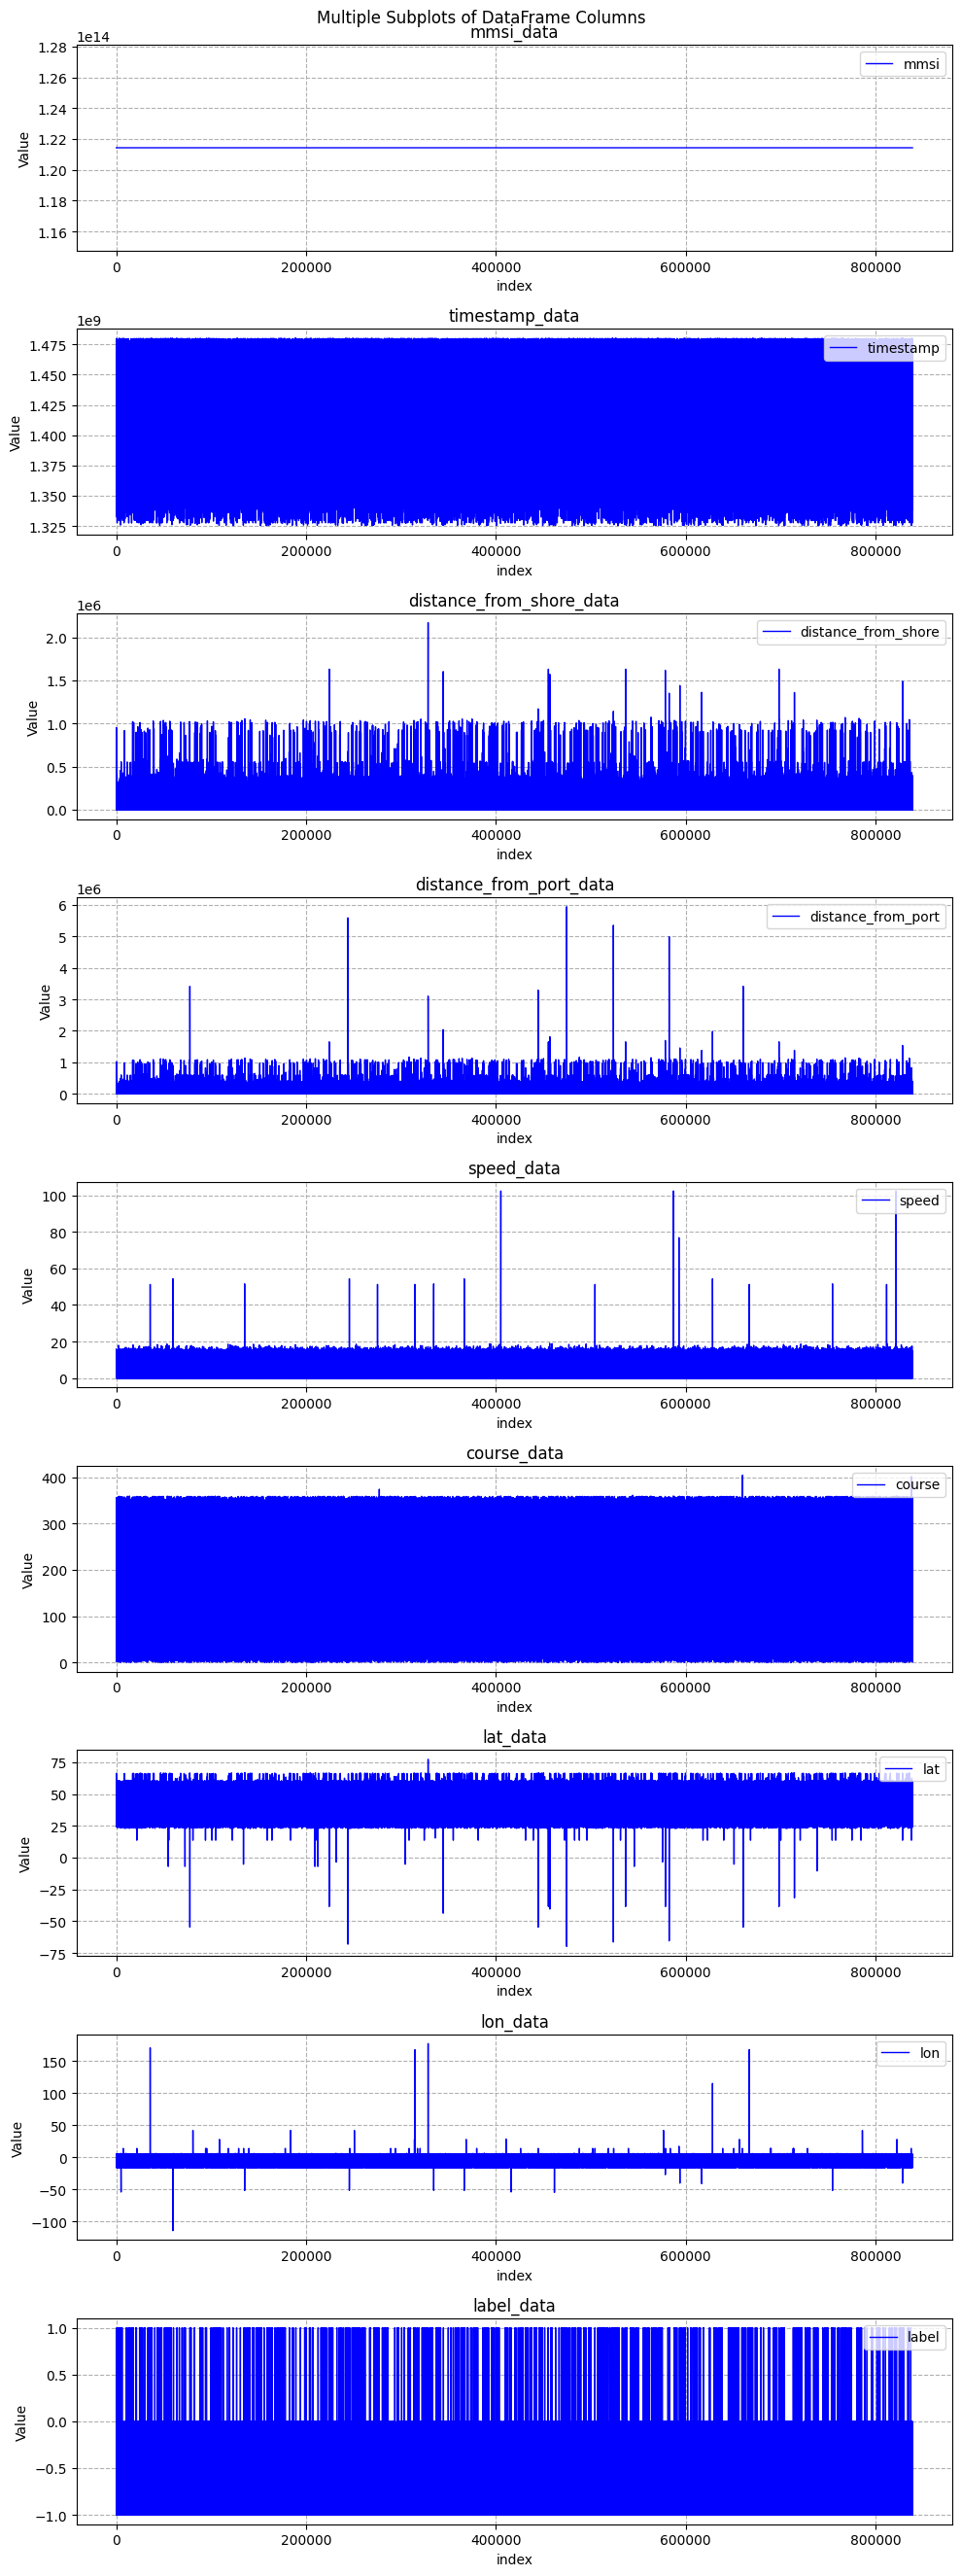

In [21]:
# structure and relationships between variables.
df= labeled_data.loc[labeled_data["mmsi"]==121426486551523]
fig, axes= plt.subplots(nrows=(len(df.columns)), ncols=1, figsize=(10, 3 * len(df.columns)))
for i, column in enumerate(df.columns):
    ax=axes[i]
    df[column].plot(ax=ax,legend=True,title=f'{column}_data', linewidth=1, color= 'b')
    ax.set_xlabel('index')  # X-axis label
    ax.set_ylabel('Value')  # Y-axis label
    ax.legend([column], loc='upper right')  # Legend

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=1)

# Add a main title for the entire plot
plt.suptitle('Multiple Subplots of DataFrame Columns\n', fontsize=12)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

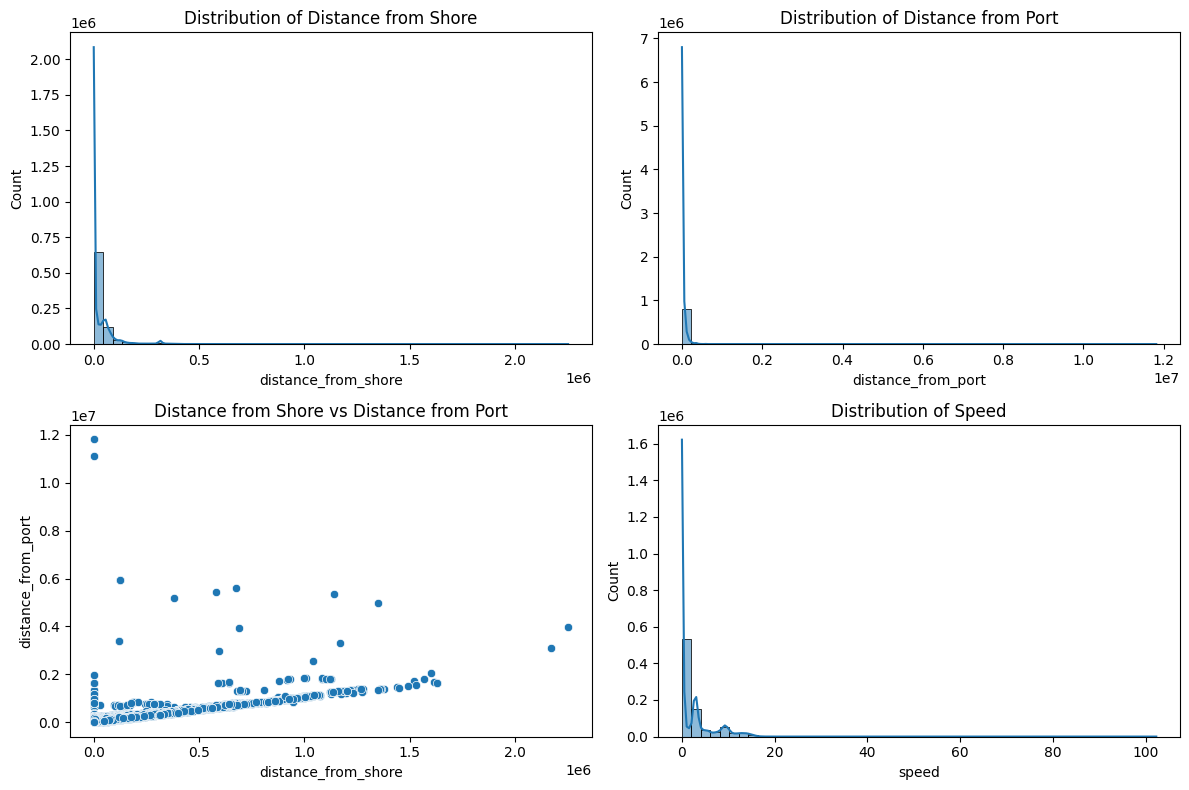

In [22]:
# Data Visualization
plt.figure(figsize=(12, 8))

# Distribution of 'distance_from_shore'
plt.subplot(2, 2, 1)
sns.histplot(labeled_data['distance_from_shore'], bins=50, kde=True)
plt.title('Distribution of Distance from Shore')

# Distribution of 'distance_from_port'
plt.subplot(2, 2, 2)
sns.histplot(labeled_data['distance_from_port'], bins=50, kde=True)
plt.title('Distribution of Distance from Port')

# Scatter plot of 'distance_from_shore' vs 'distance_from_port'
plt.subplot(2, 2, 3)
sns.scatterplot(x='distance_from_shore', y='distance_from_port', data=labeled_data)
plt.title('Distance from Shore vs Distance from Port')

# Distribution of 'speed'
plt.subplot(2, 2, 4)
sns.histplot(labeled_data['speed'], bins=50, kde=True)
plt.title('Distribution of Speed')

plt.tight_layout()
plt.show()

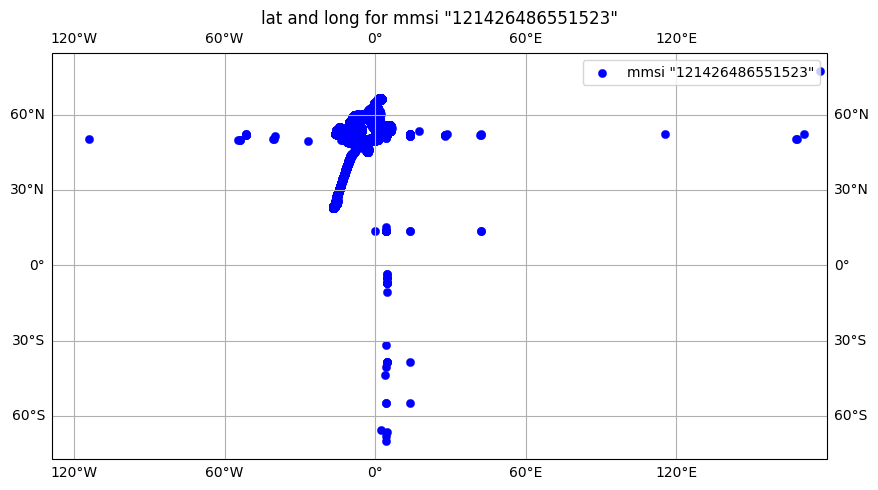

In [23]:
import cartopy.crs as ccrs

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()},figsize= (10,10))

# Customize the map (e.g., add coastlines, gridlines, and a title)

ax.scatter(df['lon'],df['lat'],color= 'b', linewidth=0.25)

#ax.coastlines()
ax.legend(['mmsi "121426486551523"'])
ax.gridlines(draw_labels=True)
ax.set_title('lat and long for mmsi "121426486551523"')

# Show the map
plt.show()


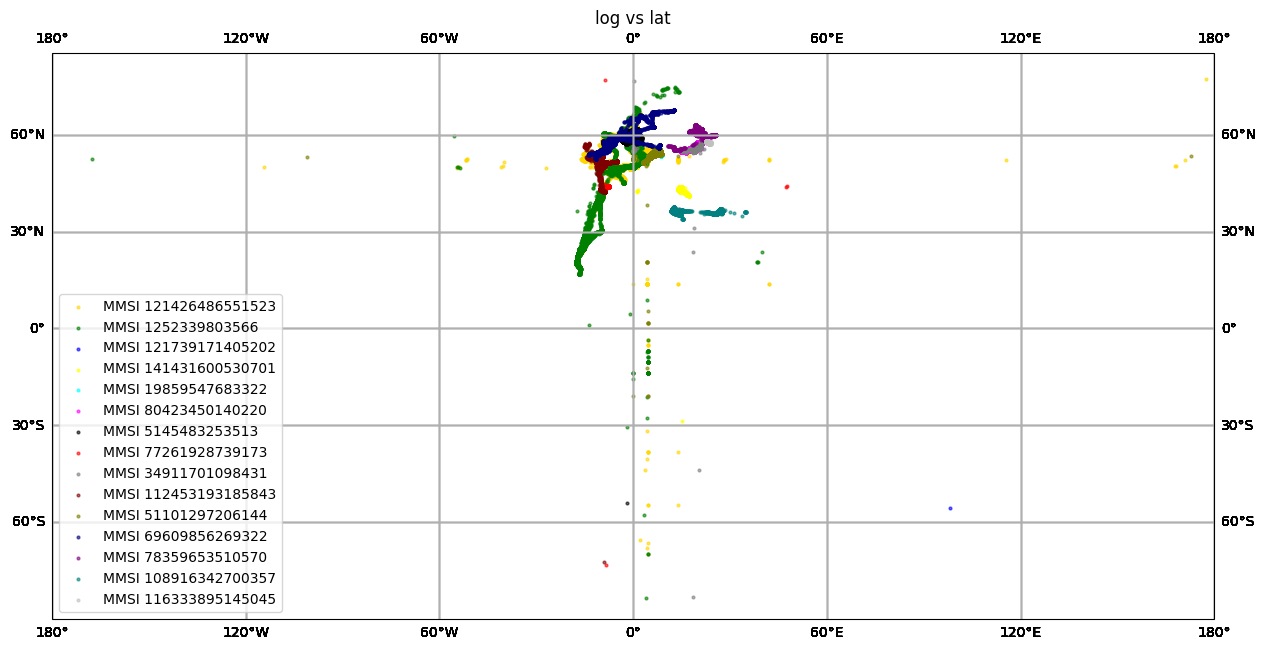

In [24]:
mmsi_unique= labeled_data['mmsi'].unique().tolist()
mmsi_unique

colors= ['Gold','Green','Blue','Yellow','Cyan','Magenta','Black','Red','Grey','Maroon','Olive','Navy','Purple','Teal','Silver']

fig,  ax = plt.subplots(figsize=(15,19),subplot_kw={'projection':ccrs.PlateCarree()})
#ax.add_feature(cfeature.BORDERS, linestyle='--',edgecolor='gray', linewidth=0.5)
#ax.add_feature(cfeature.NaturalEarthFeature)
legends=[]
for i,mmsi in enumerate(mmsi_unique):
    df= labeled_data[labeled_data["mmsi"]==mmsi]
    ax.scatter(df['lon'],df['lat'],color=colors[i],marker= 'o',s=4 ,alpha=0.6)
    ax.set_xlabel('longitude')
    ax.set_label("latitutde")
    #ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_title('lat and long for mmsi "121426486551523"')
    i+=1
    legends.append(f'MMSI {mmsi}')
plt.legend(legends,loc="lower left",)
plt.title("log vs lat")
plt.grid(True,linestyle= "--",alpha=1)

plt.show()

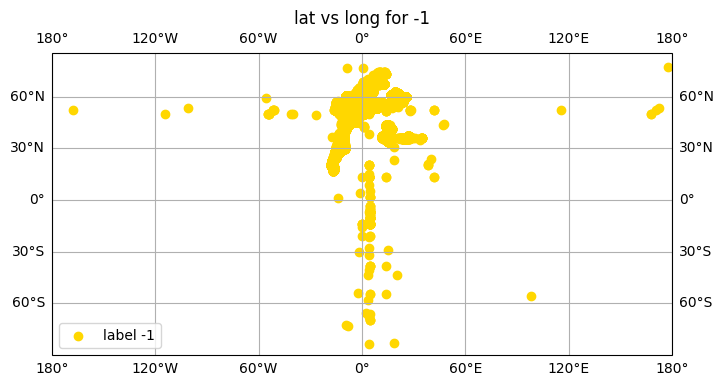

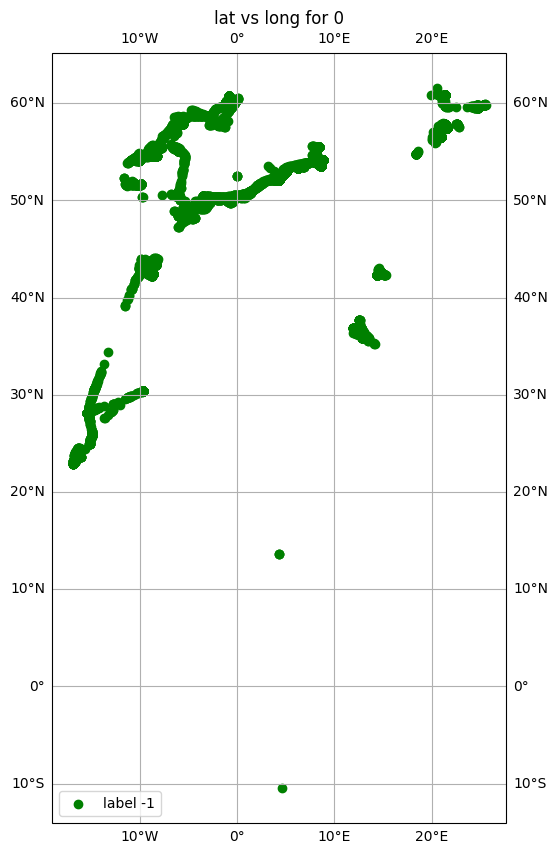

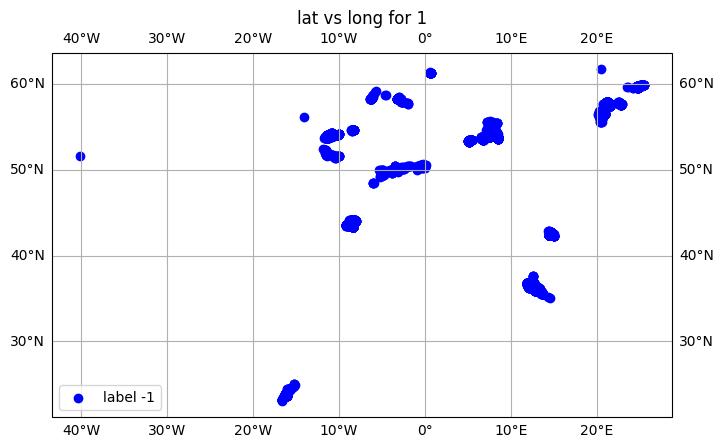

['0:Not fishing', '1:Fishing', '-1:No class label']


In [25]:
labels= labeled_data['label'].unique().tolist()
legends=[]
clases =["0:Not fishing","1:Fishing","-1:No class label"]
for i,label in enumerate(labels):
    fig,ax= plt.subplots(figsize=(8,10),subplot_kw={'projection':ccrs.PlateCarree()})
    df= labeled_data[labeled_data['label']==label]
    ax.scatter(df['lon'],df['lat'], color= 'g' if label==0 else colors[i])
    ax.set_xlabel('longitude')
    ax.set_label("latitutde")
    #ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.set_title(f'lat vs long for {label}')
    legends.append(f'label {label}')
    plt.legend(legends,loc="lower left",)
    #plt.title("log vs lat")
    plt.grid(True,linestyle= "--",alpha=1)

plt.show()
print(clases)


C:\Users\Khushi Chaudhari\AppData\Local\Temp\ipykernel_11128\3972460603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=labeled_data, palette=class_colors)


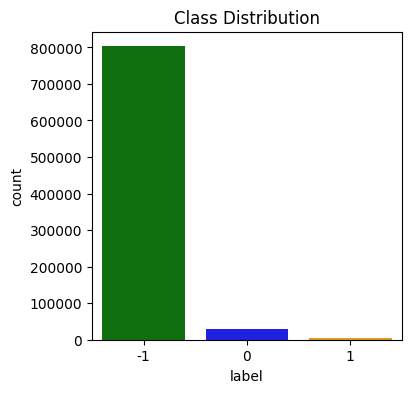

In [26]:
#plot for class distribution.
class_colors = {'0': 'blue', '1': 'orange', '-1': 'green'}
plt.figure(figsize=(4, 4))
sns.countplot(x="label", data=labeled_data, palette=class_colors)
plt.title("Class Distribution")
plt.show()

UNDERSAMPLING OF DATA AS DATA IS VERY IMBALANCED:

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter



# Assuming the last column is the target variable
X = labeled_data.iloc[:, :-1].values
y = labeled_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y_train))
print()
# Specify the undersampling ratio for each class
undersampling_ratios = {
    -1: 4640,  # Undersample class -1 to the same size as the minority classes
     0: 4640,# Undersample class 0 to the same size as the minority classes
     1: 4640  # Undersample class 1 to the same size as the minority classes
}

# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy=undersampling_ratios, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))
print()
print("length of X:  ",len(X_resampled))

Class distribution before undersampling: Counter({-1: 642339, 0: 24109, 1: 4640})

Class distribution after undersampling: Counter({-1: 4640, 0: 4640, 1: 4640})

length of X:   13920


In [28]:
import pandas as pd
import numpy as np

# Assuming X_resampled and y_resampled are NumPy arrays
# Concatenate along columns using numpy.concatenate
resampled_data = pd.DataFrame(np.concatenate([X_resampled, y_resampled.reshape(-1, 1)], axis=1))

# Assuming you have column names for X, replace them accordingly
column_names_X = ['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon']  # replace with actual column names
column_names_y = ["label"]  # replace with the actual column name for y

# Set column names for the concatenated DataFrame
resampled_data.columns = column_names_X + column_names_y

print(resampled_data.shape)
#print(resampled_data)
(resampled_data.columns)


(13920, 9)


Index(['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon', 'label'],
      dtype='object')

C:\Users\Khushi Chaudhari\AppData\Local\Temp\ipykernel_11128\1263627182.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df_resampled, palette=class_colors)


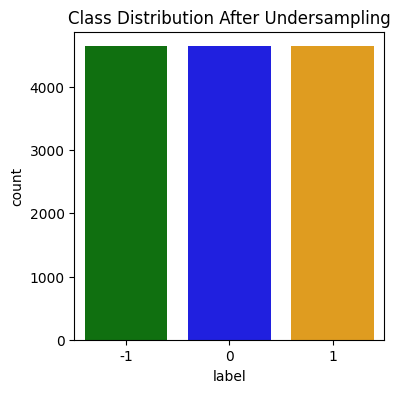

In [29]:


# Assuming 'label' is the column name for the target variable
df_resampled = pd.DataFrame({'label': y_resampled})

class_colors = {'0': 'blue', '1': 'orange', '-1': 'green'}

# Plot class distribution
plt.figure(figsize=(4, 4))
sns.countplot(x="label", data=df_resampled, palette=class_colors)
plt.title("Class Distribution After Undersampling")
plt.show()

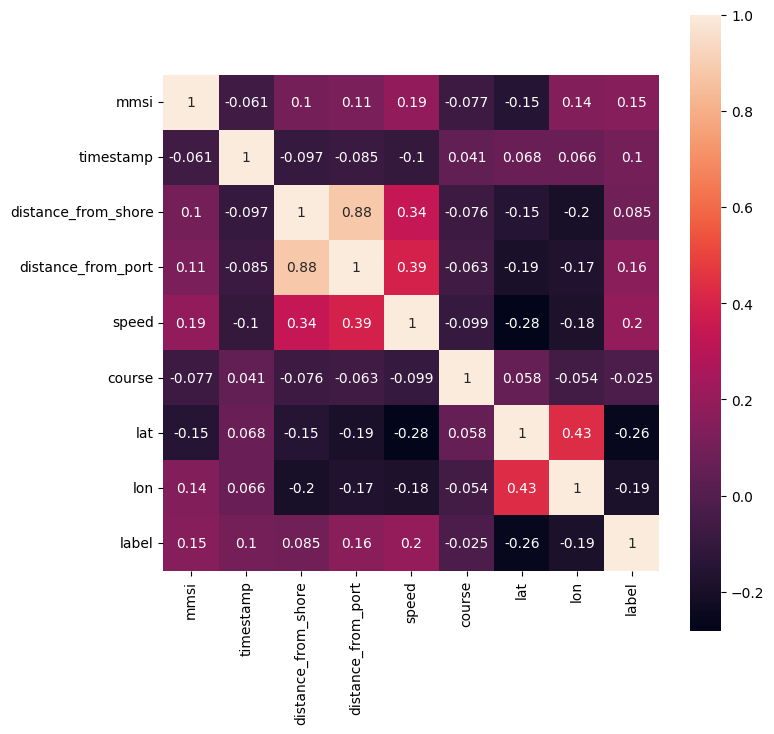

In [30]:
# Correlation Matrix
corr_matrix =resampled_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, square=True)
#sns.heatmap(corr_matrix, annot=True,square=True, cmap='coolwarm')
plt.show()

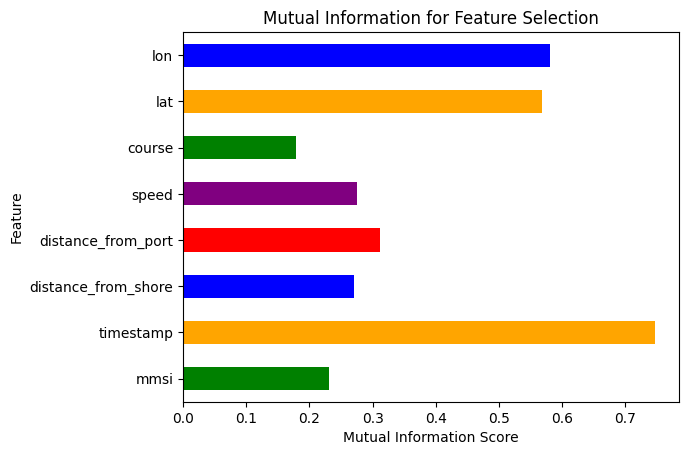

In [31]:

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split




x = resampled_data.drop(columns=['label'])
y = resampled_data.label
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Compute Mutual Information
importances = mutual_info_classif(X_train, y_train)

# Create a Series for Visualization
feat_importances = pd.Series(importances, index=X_train.columns)

# Define colors for each feature
feature_colors = ['green', 'orange', 'blue', 'red', 'purple']  

# Plot Feature Importances with custom colors
feat_importances.plot(kind='barh', color=feature_colors)
plt.title('Mutual Information for Feature Selection')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()

Models: 1) Logistic regression


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")
# Assuming X_train, X_test, y_train, and y_test are already defined

# Create and train the Logistic Regression model
LR_classifier1 = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
LR_classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = LR_classifier1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for logistic regression :', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")


Confusion Matrix:
[[  0   0 922]
 [  0   0 961]
 [  0   0 901]]
Predictive Accuracy achieved for logistic regression : 32.36350574712644
Weighted Precision: 0.11
Weighted Recall: 0.33
Weighted F1 Score: 0.16


2) KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier


# Assuming X_train, X_test, y_train, and y_test are already defined

# Create and train the KNN classifier
KNN_classifier1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = KNN_classifier1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for KNN:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Weighted Precision: {precision:.2f}")
print(f"Weighted Recall: {recall:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")


Confusion Matrix:
[[900  13   9]
 [  0 901  60]
 [  1   6 894]]
Predictive Accuracy achieved for KNN: 96.80316091954023
Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1 Score: 0.97


3) Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

# Assuming X_train, X_test, y_train, and y_test are already defined

# Create and train the Gaussian Naive Bayes classifier
NB_classifier1 = GaussianNB()
NB_classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = NB_classifier1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for Naive Bayes:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[253 169 500]
 [199 125 637]
 [ 97 123 681]]
Predictive Accuracy achieved for Naive Bayes: 38.03879310344828
Macro Precision: 0.38
Macro Recall: 0.39
Macro F1 Score: 0.34


4) Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Assuming X_train, X_test, y_train, and y_test are already defined

# Create and train the Decision Tree classifier
DT_classifier1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier1 .fit(X_train, y_train)

# Make predictions on the test set
y_pred = DT_classifier1 .predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for Decision Tree:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[895  17  10]
 [  9 910  42]
 [  6  37 858]]
Predictive Accuracy achieved for Decision Tree: 95.65373563218391
Macro Precision: 0.96
Macro Recall: 0.96
Macro F1 Score: 0.96


5) RFC

In [36]:

from sklearn.ensemble import RandomForestClassifier


# Assuming X_train, X_test, y_train, and y_test are already defined

# Create and train the RandomForestClassifier
RFC_classifier1 = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
RFC_classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = RFC_classifier1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[894  11  17]
 [  4 908  49]
 [  2  16 883]]
Predictive Accuracy achieved for RFC: 96.44396551724138
Macro Precision: 0.96
Macro Recall: 0.96
Macro F1 Score: 0.96


6) SVM 

In [37]:
from sklearn.svm import SVC


# Assuming X_train, X_test, y_train, and y_test are already defined

# Create and train the SVM classifier
SVM_classifier1 = SVC(kernel='rbf', random_state=42)
SVM_classifier1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVM_classifier1.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for SVM:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[529 108 285]
 [388  81 492]
 [296 117 488]]
Predictive Accuracy achieved for SVM: 39.439655172413794
Macro Precision: 0.36
Macro Recall: 0.40
Macro F1 Score: 0.36


As we have seen not all features are affecting equally based on mutual information. So based on it features selected are : lon, lat, timestamp.

Logistic regression after feature selection:

In [38]:


# Assuming X_train, X_test, y_train, and y_test are already defined, and you want to use only three specific features

# Specify the names of the three features you want to use
selected_features = ['lat', 'lon', 'timestamp']  

# Select only the specified features from the training and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Create and train the Logistic Regression model using the selected features
LR_classifier_F = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
LR_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = LR_classifier_F.predict(X_test_selected)


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[  0   0 922]
 [  0   0 961]
 [  0   0 901]]
Predictive Accuracy achieved for RFC: 32.36350574712644
Macro Precision: 0.11
Macro Recall: 0.33
Macro F1 Score: 0.16


KNN after feature selection:

In [39]:
KNN_classifier_F = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = KNN_classifier_F.predict(X_test_selected)

m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

## Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[  0   0 922]
 [  0   0 961]
 [  0   0 901]]
Predictive Accuracy achieved for RFC: 83.58477011494253
Macro Precision: 0.84
Macro Recall: 0.84
Macro F1 Score: 0.84


Naive bayes after feature selection:

In [40]:
NB_classifier_F = GaussianNB()
NB_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = NB_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[593 184 145]
 [  0 567 394]
 [  0 262 639]]
Predictive Accuracy achieved for RFC: 64.61925287356321
Macro Precision: 0.70
Macro Recall: 0.65
Macro F1 Score: 0.66


Decision tree after feature selection :

Confusion Matrix:
[[909   5   8]
 [  5 913  43]
 [  5  19 877]]
Predictive Accuracy achieved for RFC: 96.94683908045977
Macro Precision: 0.97
Macro Recall: 0.97
Macro F1 Score: 0.97


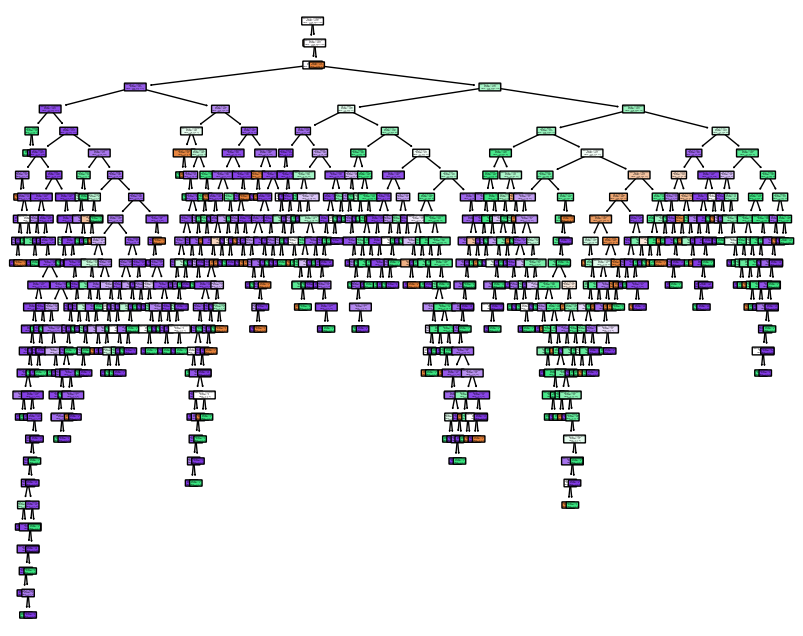

In [41]:
from sklearn.tree import  plot_tree

DT_classifier_F = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = DT_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")

# Plot the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(DT_classifier_F, feature_names=selected_features, class_names=['-1', '0', '1'], filled=True, rounded=True)
plt.show()

Random Forest Classifier after feature selection:

In [42]:
RFC_classifier_F = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
RFC_classifier_F.fit(X_train_selected, y_train)

# Make predictions on the test set using the selected features
y_pred = RFC_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for RFC:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")


Confusion Matrix:
[[910   4   8]
 [ 10 906  45]
 [  8  18 875]]
Predictive Accuracy achieved for RFC: 96.65948275862068
Macro Precision: 0.97
Macro Recall: 0.97
Macro F1 Score: 0.97


SVM after feature selection:

In [43]:
SVM_classifier_F = SVC(kernel='rbf', random_state=42)
SVM_classifier_F.fit(X_train_selected , y_train)

# Make predictions on the test set
y_pred = SVM_classifier_F.predict(X_test_selected)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print('Predictive Accuracy achieved for SVM:', accuracy * 100)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Macro Precision: {precision:.2f}")
print(f"Macro Recall: {recall:.2f}")
print(f"Macro F1 Score: {f1:.2f}")

Confusion Matrix:
[[252 293 377]
 [  0  26 935]
 [  0   6 895]]
Predictive Accuracy achieved for SVM: 42.133620689655174
Macro Precision: 0.50
Macro Recall: 0.43
Macro F1 Score: 0.35


 Cross Validation using K-fold

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DT_classifier_F , X = X_train, y = y_train)
print("Accuracy mean: {:.2f} %".format(accuracies.mean()*100))
print("Accuracy min: {:.2f} %".format(accuracies.min()*100))
print("Accuracy max: {:.2f} %".format(accuracies.max()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy mean: 95.29 %
Accuracy min: 94.88 %
Accuracy max: 96.36 %
Standard Deviation: 0.54 %


Cross Validation using Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Assuming DT_classifier_F, X_train, y_train are already defined
# Replace DecisionTreeClassifier with your actual classifier if needed

# Define the hyperparameter grid
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV with the trained Decision Tree classifier
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)

# Assuming X_train, y_train are your training data
grid.fit(X_train_selected, y_train)

# Get the best results
best_accuracy = grid.best_score_
best_parameters = grid.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)



Best Accuracy: 94.76 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


TESTIG THE MODEL ON TEST DATA AND GETTING THE LABELS:


In [46]:
import pandas as pd
test_data=pd.read_csv(r"C:\Users\Khushi Chaudhari\Desktop\illegal fishing\illegal_fishing_tst_data.csv")
(test_data.shape)

(209715, 8)

In [47]:
test_data.isnull().sum()

mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  2
course                 2
lat                    0
lon                    0
dtype: int64

In [48]:
mean_value = test_data['course'].mean()
test_data['course'].fillna(mean_value, inplace=True)
test_data['course'] = test_data['course'].astype(float)

In [49]:
mean_value = test_data['speed'].mean()
test_data['speed'].fillna(mean_value, inplace=True)
test_data['speed'] = test_data['speed'].astype(float)

In [54]:
columns_to_drop = ['mmsi', 'distance_from_shore', 'distance_from_port','speed', 'course']

# Drop the specified columns
test_data = test_data.drop(columns=columns_to_drop)

In [50]:
X_test = test_data

In [58]:



# Make predictions on the testing set
y_pred = RFC_classifier1.predict(X_test)

# Save the predicted labels to a text file
np.savetxt("predicted_labelsrfc.txt", y_pred, fmt="%d")

In [59]:
y_pred = KNN_classifier1.predict(X_test)

# Save the predicted labels to a text file
np.savetxt("predicted_labelsknn.txt", y_pred, fmt="%d")

In [60]:
y_pred = DT_classifier1.predict(X_test)

# Save the predicted labels to a text file
np.savetxt("predicted_labelsdt.txt", y_pred, fmt="%d")